In [9]:
import numpy as np
from six import raise_from
import csv
import sys
import os
from collections import OrderedDict
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#Mount google drive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
def readAnnotations(file):
  csvReader = csv.reader(file)
  ##Remove the header
  next(csvReader)
  result = OrderedDict()
  for row in csvReader:
    # print(row)
    if len(row) == 3:
      imagesFolder, y, x = row[0], float(row[1]), float(row[2])
      result[imagesFolder] = {"x": x, "y": y}
    elif len(row) == 4:
      imagesFolder, y, x, region = row[0], float(row[1]), float(row[2]), row[3]
      result[imagesFolder] = {"x": x, "y": y, "region": region}
    else:
      try:
        imagesFolder, y, x = row[0], float(row[4]), float(row[5])
        result[imagesFolder] = {"x": x, "y": y}
      except:
        print(row)
  return result

In [12]:
# annotationsPath = os.path.abspath("./gdrive/MyDrive/lumen/data.csv")
annotationsPath = os.path.abspath("./gdrive/MyDrive/lumen/processed_annotations.csv")

In [13]:
annotationsFile = open(annotationsPath)
annotations = readAnnotations(annotationsFile)
annotationsFile.close()

In [14]:
print(annotations)


OrderedDict([('69387a76-b6f6-4a76-9d82-59367e14cb12', {'x': 18.53839695354916, 'y': 45.55222786237915, 'region': 'Slavonija'}), ('83fd0354-8781-4325-9139-653ba0ce718f', {'x': 14.82181715265881, 'y': 45.11632629078026, 'region': 'Istra'}), ('5e2f692d-a2e6-45b1-b18b-3cec90b31b64', {'x': 18.76785331863612, 'y': 45.42498633931014, 'region': 'Slavonija'}), ('b3447ea2-8ea2-4c4e-b2a8-8611c8253995', {'x': 17.0570928956176, 'y': 46.15450138396207, 'region': 'Sjever'}), ('93c8620f-2e97-4fe1-999a-c4c423b3d878', {'x': 16.32389407347047, 'y': 43.65148208448196, 'region': 'Dalmacija'}), ('d2b3e614-71e0-4910-82dd-f19a767f3307', {'x': 15.25182092057545, 'y': 45.29523222005575, 'region': 'Sredisnja'}), ('275ca9fb-9d73-4324-b238-88d9f68fdeaf', {'x': 16.99975759416772, 'y': 45.30989747209561, 'region': 'Sredisnja'}), ('c844632c-2053-4a1c-816d-61dd2f1d0ffc', {'x': 19.15135492798874, 'y': 45.20693758219236, 'region': 'Slavonija'}), ('1a1d31ee-29a1-402b-9a84-eaf0500e6942', {'x': 15.23641089044135, 'y': 44.8

In [26]:
def visualise_samples(data, map_path):
  map = cv2.imread(map_path)
  plt.imshow(cv2.flip(map, 0))
  # print(map.shape)
  current_axis = plt.gca()
  plt.gca().invert_yaxis()
  i = 0
  for annotation in data:
    # if i == 100:
    #   break
    x0 = (data[annotation]["x"] - 13.5) / (19.45 - 13.5) * map.shape[0]
    y0 = (data[annotation]["y"] - 42.4) / (46.55 - 42.4) * map.shape[1]
    if (data[annotation]["region"] == "Lika"):
      current_axis.add_patch(plt.Circle((x0, y0), 1, color="purple", fill=True, linewidth=2))
    elif (data[annotation]["region"] == "Slavonija"):
      current_axis.add_patch(plt.Circle((x0, y0), 1, color="red", fill=True, linewidth=2))
    elif (data[annotation]["region"] == "Istra"):
      current_axis.add_patch(plt.Circle((x0, y0), 1, color="blue", fill=True, linewidth=2))
    elif (data[annotation]["region"] == "Dalmacija"):
      current_axis.add_patch(plt.Circle((x0, y0), 1, color="green", fill=True, linewidth=2))
    elif (data[annotation]["region"] == "Sjever"):
      current_axis.add_patch(plt.Circle((x0, y0), 1, color="orange", fill=True, linewidth=2))
    elif (data[annotation]["region"] == "Sredisnja"):
      current_axis.add_patch(plt.Circle((x0, y0), 1, color="yellow", fill=True, linewidth=2))
    else:
      current_axis.add_patch(plt.Circle((x0, y0), 1, color="brown", fill=True, linewidth=2))
    i += 1

In [23]:
def visualise_samples_reg(data, map_path):
  map = cv2.imread(map_path)
  plt.imshow(cv2.flip(map, 0))
  # print(map.shape)
  current_axis = plt.gca()
  plt.gca().invert_yaxis()
  i = 0
  for annotation in data:
    # if i == 100:
    #   break
    if not (data[annotation]["x"] <= 14.520273 and data[annotation]["y"] >= 45.534869):
      x0 = (data[annotation]["x"] - 13.5) / (19.45 - 13.5) * map.shape[0]
      y0 = (data[annotation]["y"] - 42.4) / (46.55 - 42.4) * map.shape[1]
      current_axis.add_patch(plt.Circle((x0, y0), 1, color="red", fill=True, linewidth=2))
    i += 1
  print(i)

16000


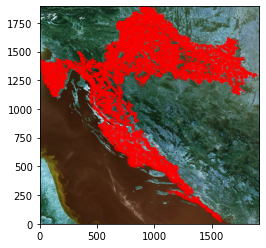

In [27]:
map_path = "./gdrive/MyDrive/lumen/croatia-satellite-map.jpg"
visualise_samples_reg(annotations, map_path)

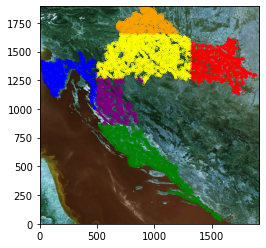

In [28]:
visualise_samples(annotations, map_path)

In [ ]:
def summary(data):
  regions = OrderedDict()
  for annotation in data:
    if len(data[annotation]) != 3:
      print("No regions added")
      print("Data example:", data[annotation])
      break
    else:
      if regions.get(data[annotation]["region"]) != None:
        regions[data[annotation]["region"]] += 1
      else:
        regions[data[annotation]["region"]] = 1
  for region in regions.keys():
    print("There are {x} points in {region}".format(x = regions[region], region = region))


In [ ]:
summary(annotations)

In [ ]:
def create_histogram(annotations):
  x_coord = []
  y_coord = []
  for i in annotations.values():
    x_coord.append(i["x"])
    y_coord.append(i["y"])
    
  n, bins, patches = plt.hist(x=x_coord, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title('Longitude histogram')
  maxfreq = n.max()
  # Set a clean upper y-axis limit.
  plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
  plt.show()

  n, bins, patches = plt.hist(x=y_coord, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title('Latitude histogram')
  maxfreq = n.max()
  plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
  plt.show()

In [ ]:
create_histogram(annotations)

In [ ]:
regression_annotations_path = "./gdrive/MyDrive/lumen/regression_annotations.csv"
regression_annotations_file = open(regression_annotations_path)
regression_annotations = readAnnotations(regression_annotations_file)
regression_annotations_file.close()
create_histogram(regression_annotations)